# I] Import and options


In [1]:
import pandas, numpy, seaborn, scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [4]:
path = output_file_directory + "ATG7/MEF/Seahorse_results/"

# II] DL data

## A) Extracellular Acidification Rate 

In [11]:
%%time
file_names = "ecar_exp1_df_", "ecar_exp2_df_", "ecar_exp3_df_"
all_conditions = "dmso", "baf"
lvl_studied = '_glycolysis', '_max_glycolysis'

ecar_exps = []
#for basal and maximum
for level in lvl_studied:
    #for DMSO and BAF
    for condition in all_conditions:
        #For experiment 1, 2 and 3
        for file_name in file_names: 
            #download data
            path2 = f'/seahorse_ECAR/dataframes_for_input/{file_name}{condition}{level}.csv'
            df_ori = pandas.read_csv(path+path2, sep = ",")
            
            #create normalized columns and rename
            df = df_ori.assign(EV_dox_ctl= df_ori['Empty Vector +dox']/ df_ori['Empty Vector -dox'],
                               EV_norm= df_ori['Empty Vector +dox']/ df_ori['Empty Vector +dox'],
                               ATG7_1norm= df_ori['ATG7(1)']/ df_ori['Empty Vector +dox'],
                               ATG7_2norm= df_ori['ATG7(2)']/ df_ori['Empty Vector +dox'])
            
            #add what experiment it is + condition + level
            df['exp'] = file_name.split('_')[1]
            df['condition'] = condition
            df['level studied'] = level.split('_')[1]

            df = df.iloc[:,6:] #select the 4 normalized columns
            df = df.rename(columns = {'EV_dox_ctl' : 'MEF dox control', 
                                      'ATG7_1norm' : 'ATG7(1)',
                                      'ATG7_2norm' : 'ATG7(2)'})
            df['Empty Vector -dox'] = df_ori['Empty Vector -dox']
            df['Empty Vector +dox'] = df_ori['Empty Vector +dox']
            ecar_exps.append(df)

recap_ecar_dmso_glyco = pandas.concat([ecar_exps[0], ecar_exps[1], ecar_exps[2]], axis=0)
recap_ecar_baf_glyco = pandas.concat([ecar_exps[3], ecar_exps[4], ecar_exps[5]], axis=0)
recap_ecar_dmso_max_glyco = pandas.concat([ecar_exps[6], ecar_exps[7], ecar_exps[8]], axis=0)
recap_ecar_baf_max_glyco = pandas.concat([ecar_exps[9], ecar_exps[10], ecar_exps[11]], axis=0)

print(df_ori.iloc[:,1:].head())
print(df.iloc[:,:].head())

   Normal MEF  Empty Vector -dox  Empty Vector +dox   ATG7(1)   ATG7(2)
0    7.849888           5.188145           6.521133  6.088248  4.247337
1    8.187707           5.228177           6.950882  6.547525  4.758275
2    8.461249           5.822747           7.713078  6.945900  5.201399
   MEF dox control  EV_norm   ATG7(1)   ATG7(2)   exp condition level studied  \
0         1.256930      1.0  0.933618  0.651319  exp3       baf           max   
1         1.329504      1.0  0.941970  0.684557  exp3       baf           max   
2         1.324646      1.0  0.900535  0.674361  exp3       baf           max   

   Empty Vector -dox  Empty Vector +dox  
0           5.188145           6.521133  
1           5.228177           6.950882  
2           5.822747           7.713078  
Wall time: 88.8 ms


### 1) Statistic

In [12]:
dfs = recap_ecar_dmso_glyco, recap_ecar_baf_glyco, recap_ecar_dmso_max_glyco, recap_ecar_baf_max_glyco
infos = 'DMSO_glycoysis', 'BAF_glycoysis', 'DMSO_max_capacity', 'BAF_max_capacity'

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    print(info.upper())

    # Mann-Whitney analysis
    #controls
    statistic, pvalue = scipy.stats.mannwhitneyu(df['Empty Vector +dox'], df['Empty Vector -dox'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue no dox vs dox is {Pvalue}')
    
    #isoform1 vs ev
    statistic, pvalue = scipy.stats.mannwhitneyu(df['ATG7(1)'], df['EV_norm'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue ATG7(1) vs dox is {Pvalue}')    
    
    #isoform2 vs ev
    statistic, pvalue = scipy.stats.mannwhitneyu(df['ATG7(2)'], df['EV_norm'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue ATG7(2) vs dox is {Pvalue}')    

    #isoforms
    statistic, pvalue = scipy.stats.mannwhitneyu(df['ATG7(1)'], df['ATG7(2)'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue: ATG7(1) vs ATG7(2) is {Pvalue}\n')

DMSO_GLYCOYSIS
pvalue no dox vs dox is 1.853E-01
pvalue ATG7(1) vs dox is 1.610E-04
pvalue ATG7(2) vs dox is 1.610E-04
pvalue: ATG7(1) vs ATG7(2) is 4.123E-04

BAF_GLYCOYSIS
pvalue no dox vs dox is 1.000E+00
pvalue ATG7(1) vs dox is 2.201E-01
pvalue ATG7(2) vs dox is 1.610E-04
pvalue: ATG7(1) vs ATG7(2) is 4.123E-04

DMSO_MAX_CAPACITY
pvalue no dox vs dox is 5.206E-02
pvalue ATG7(1) vs dox is 1.610E-04
pvalue ATG7(2) vs dox is 3.795E-02
pvalue: ATG7(1) vs ATG7(2) is 4.123E-04

BAF_MAX_CAPACITY
pvalue no dox vs dox is 8.598E-01
pvalue ATG7(1) vs dox is 7.059E-01
pvalue ATG7(2) vs dox is 1.610E-04
pvalue: ATG7(1) vs ATG7(2) is 4.123E-04



In [25]:
dfs = recap_ecar_dmso_glyco, recap_ecar_baf_glyco, recap_ecar_dmso_max_glyco, recap_ecar_baf_max_glyco
infos = 'DMSO_glycoysis', 'BAF_glycoysis', 'DMSO_max_capacity', 'BAF_max_capacity'

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    print(info.upper())

    # Mann-Whitney analysis
    #controls
    statistic, pvalue = scipy.stats.mannwhitneyu(df['Empty Vector +dox'], df['Empty Vector -dox'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue no dox vs dox is {Pvalue}')
    
    #isoform vs ev
    statistic, pvalue = scipy.stats.mannwhitneyu(df['ATG7_1norm'], df['Empty Vector +dox'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue no dox vs dox is {Pvalue}')    

    #isoforms
    statistic, pvalue = scipy.stats.mannwhitneyu(df['ATG7(1)'], df['ATG7(2)'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue: ATG7(1) vs ATG7(2) is {Pvalue}\n')

DMSO_GLYCOYSIS
pvalue no dox vs dox is 9.266E-02
pvalue: ATG7(1) vs ATG7(2) is 2.061E-04

BAF_GLYCOYSIS
pvalue no dox vs dox is 5.000E-01
pvalue: ATG7(1) vs ATG7(2) is 2.061E-04

DMSO_MAX_CAPACITY
pvalue no dox vs dox is 2.603E-02
pvalue: ATG7(1) vs ATG7(2) is 2.061E-04

BAF_MAX_CAPACITY
pvalue no dox vs dox is 4.299E-01
pvalue: ATG7(1) vs ATG7(2) is 2.061E-04



### 2) Graph for controls

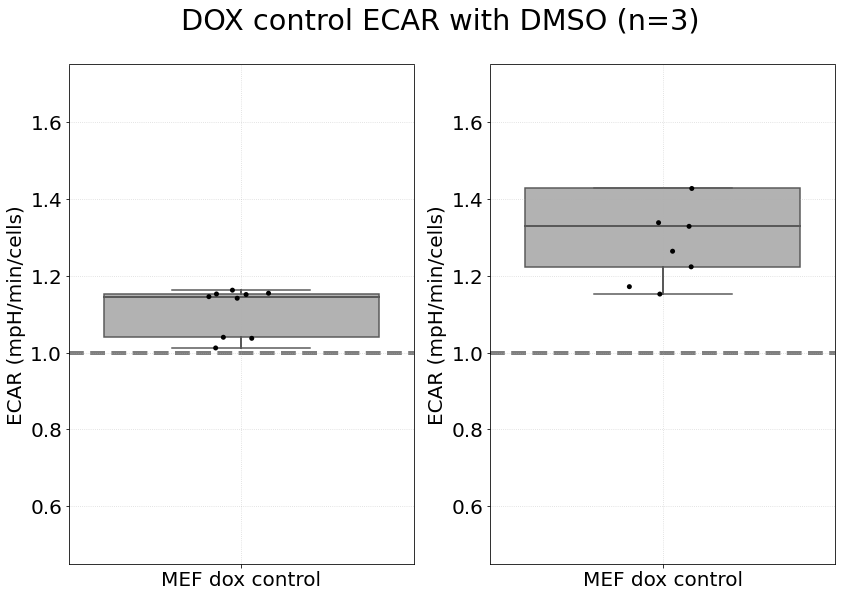

<Figure size 864x576 with 0 Axes>

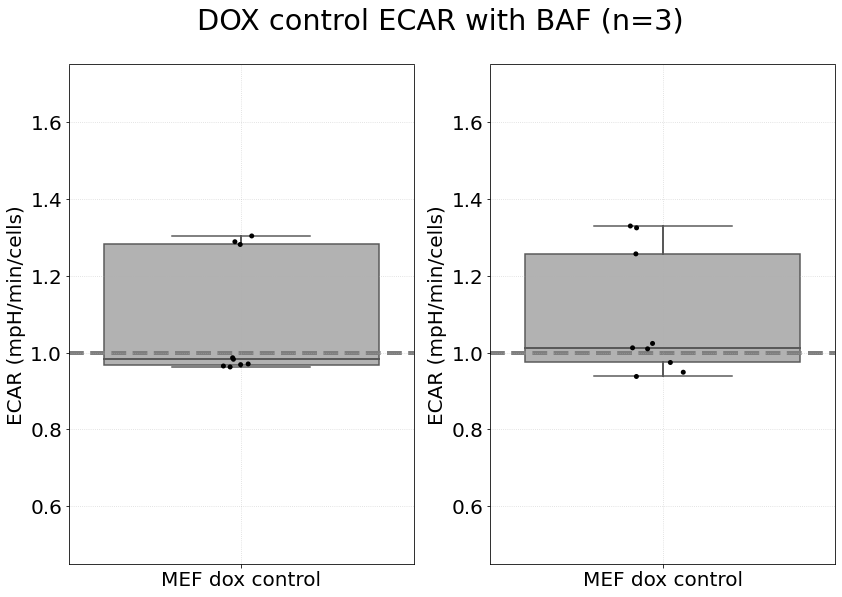

<Figure size 864x576 with 0 Axes>

In [26]:
# BASAL LEVEL RATE
dfs_glyc = recap_ecar_dmso_glyco, recap_ecar_baf_glyco
dfs_max = recap_ecar_dmso_max_glyco, recap_ecar_baf_max_glyco
infos = 'DMSO', 'BAF'

for i in range(len(dfs_glyc)):
    df_glyco = dfs_glyc[i]
    df_max = dfs_max[i]
    info = infos[i]

    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2)
    plt.tight_layout()
    fig.suptitle(f'DOX control ECAR with {info} (n=3)', y=1.05, fontsize="x-large")

    #graph for DMSO
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df_glyco.iloc[:,0:1], medianprops={'lw':2},
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df_glyco.iloc[:,0:1], color = 'k')
    
    fig.set_xlabel('')
    fig.set_ylabel('ECAR (mpH/min/cells)')

    # Select which box you want to change    
    box_nodox = fig.patches[0]
    box_nodox.set_facecolor('black')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))
    
    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,1.75)


    #graph for BAF
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df_max.iloc[:,0:1], medianprops={'lw':2},
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df_max.iloc[:,0:1], color = 'k')
    
    fig.set_xlabel('')
    fig.set_ylabel('ECAR (mpH/min/cells)')

    # Select which box you want to change    
    box_nodox = fig.patches[0]
    box_nodox.set_facecolor('black')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))
        
    fig.grid(alpha = 0.5, ls = ":")
#     fig.set_ylim(0.45,1.75)

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,1.75)
                
    # save
    path2 = 'seahorse_ECAR/'
    text_file = 'graph_all_ecar_final_'+info
    plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()

### 3) Graph for isoforms

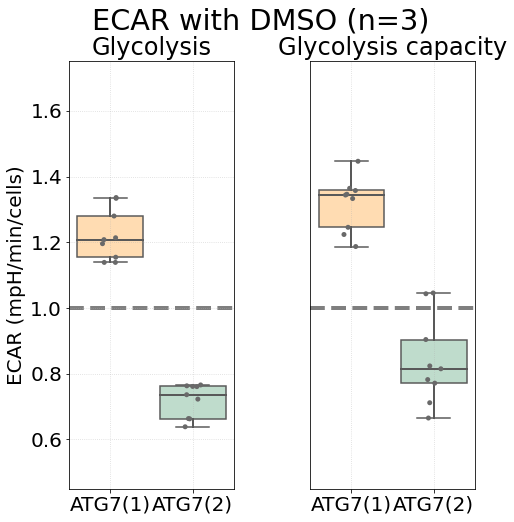

<Figure size 864x576 with 0 Axes>

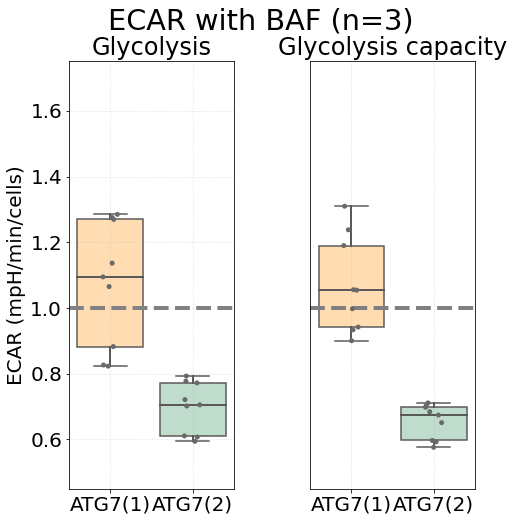

<Figure size 864x576 with 0 Axes>

In [52]:
# BASAL LEVEL RATE
dfs_glyc = recap_ecar_dmso_glyco, recap_ecar_baf_glyco
dfs_max = recap_ecar_dmso_max_glyco, recap_ecar_baf_max_glyco
infos = 'DMSO', 'BAF'

controls = 'MEF dox control'
iso1 = 'ATG7(1)'
iso2 = 'ATG7(2)'

for i in range(len(dfs_glyc)):
    df_glyco = dfs_glyc[i]
    df_max = dfs_max[i]
    info = infos[i]

    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2, figsize=(7, 7))
    plt.tight_layout()
    fig.suptitle(f'ECAR with {info} (n=3)', y=1.05, fontsize="x-large")

    #graph for GLYCOLYSIS
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df_glyco.iloc[:,1:3], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df_glyco.iloc[:,1:3], color = 'dimgray')
    
    fig.set_title('Glycolysis')
    fig.set_xlabel('')
    fig.set_ylabel('ECAR (mpH/min/cells)')

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,1.75)


    #graph for MAXIMUM CAPACITY
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df_max.iloc[:,1:3], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df_max.iloc[:,1:3], color = 'dimgray')
   
    fig.set_title('Glycolysis capacity')
    fig.set_xlabel('')
    fig.set_ylabel('')
    fig.set_yticks([])

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,1.75)
                
    # save
    path2 = 'seahorse_ECAR/'
    text_file = 'graph_all_ecar_final_'+info
    plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()

## B) Oxygen Consumption Rate 

In [28]:
%%time
file_names = "ocr_exp2_df_", "ocr_exp7_df_", "ocr_exp12_df_", "ocr_exp13_df_"
all_conditions = "dmso", "baf"
lvl_studied = '_basal', '_maximum'

ocr_exps = []
#for basal and maximum
for level in lvl_studied:
    #for DMSO and BAF
    for condition in all_conditions:
        #For experiment 1, 2 and 3
        for file_name in file_names: 
            #download data
            path2 = f'seahorse_OCR/dataframes_for_input/{file_name}{condition}{level}.csv'
            df_ori = pandas.read_csv(path+path2, sep = ",")
            #create normalized columns and rename
            df = df_ori.assign(EV_dox_ctl= df_ori['Empty Vector +dox']/ df_ori['Empty Vector -dox'],
                               ATG7_1norm= df_ori['ATG7(1)']/ df_ori['Empty Vector +dox'],
                               ATG7_2norm= df_ori['ATG7(2)']/ df_ori['Empty Vector +dox'])
            df['exp'] = file_name.split('_')[1]
            df['condition'] = condition
            df['level studied'] = level.split('_')[1]
            df = df.iloc[:,5:] #select the 3 normalized columns
            df = df.rename(columns = {'EV_dox_ctl' : 'MEF dox control', 
                                      'ATG7_1norm' : 'ATG7(1)',
                                      'ATG7_2norm' : 'ATG7(2)'})
            ocr_exps.append(df)

#basal level in experiment 12 is not good. Not stable, go down. I remove it
recap_ocr_dmso_basal = pandas.concat([ocr_exps[0], ocr_exps[1], ocr_exps[3]], axis=0)
recap_ocr_baf_basal = pandas.concat([ocr_exps[4], ocr_exps[5], ocr_exps[7]], axis=0)
recap_ocr_dmso_max = pandas.concat([ocr_exps[8], ocr_exps[9], ocr_exps[10], ocr_exps[11]], axis=0)
recap_ocr_baf_max = pandas.concat([ocr_exps[12], ocr_exps[13], ocr_exps[14], ocr_exps[15]], axis=0)

print(recap_ocr_dmso_basal, '\n', recap_ocr_baf_basal)

   MEF dox control   ATG7(1)   ATG7(2)    exp condition level studied
0         0.666695  1.458469  1.494814   exp2      dmso         basal
1         0.678680  1.486579  1.504491   exp2      dmso         basal
2         0.679001  1.494178  1.513714   exp2      dmso         basal
3         0.678113  1.494656  1.509662   exp2      dmso         basal
4         0.679087  1.494944  1.502106   exp2      dmso         basal
5         0.676222  1.490811  1.499106   exp2      dmso         basal
0         1.329883  1.108199  0.502076   exp7      dmso         basal
1         1.262581  1.149208  0.553143   exp7      dmso         basal
2         1.245307  1.133166  0.573492   exp7      dmso         basal
3         1.206674  1.145803  0.579330   exp7      dmso         basal
4         1.168701  1.144112  0.586895   exp7      dmso         basal
5         1.149549  1.199558  0.617820   exp7      dmso         basal
0         0.889392  1.306731  0.927185  exp13      dmso         basal
1         0.916289  

### 1) Basal level rate

the pvalue between no dox and dox with DMSO is 3.313E-01 for basal level rate
the pvalue between ATG7(1) and ATG7(2) with, DMSO is 4.233E-02


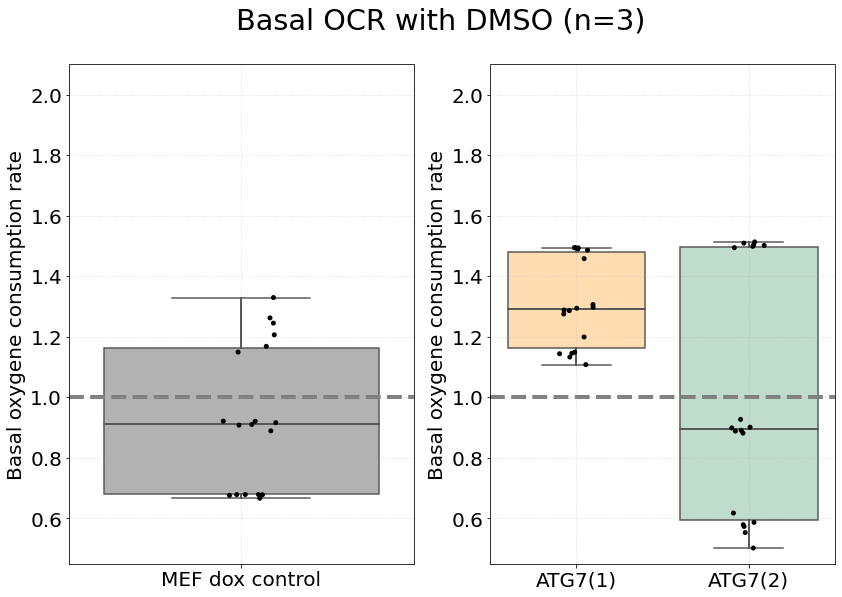

the pvalue between no dox and dox with BAF is 3.313E-01 for basal level rate
the pvalue between ATG7(1) and ATG7(2) with, BAF is 1.588E-05


<Figure size 864x576 with 0 Axes>

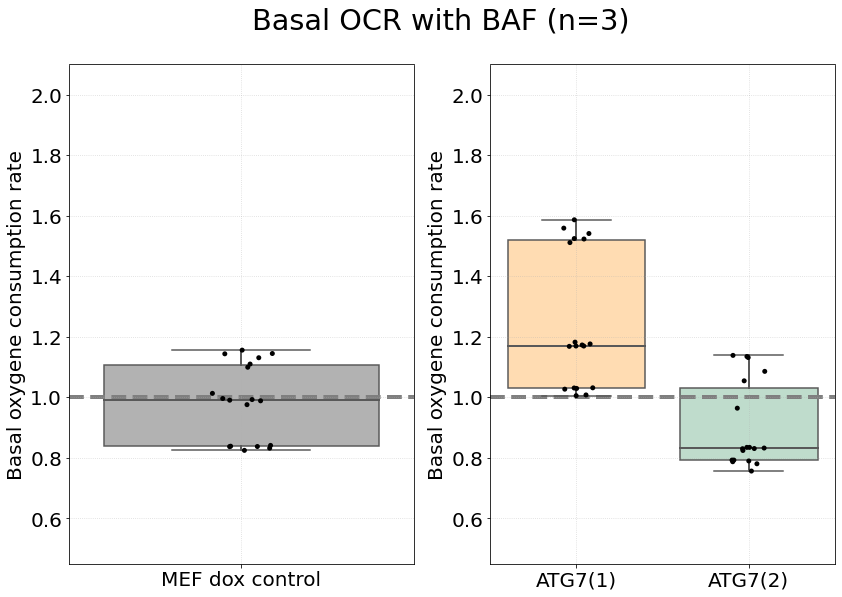

<Figure size 864x576 with 0 Axes>

In [29]:
# BASAL LEVEL RATE
dfs = recap_ocr_dmso_basal, recap_ocr_baf_basal
infos = 'DMSO', 'BAF'

controls = 'MEF dox control'
iso1 = 'ATG7(1)'
iso2 = 'ATG7(2)'

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]

    # Mann-Whitney analysis
    #controls
    statistic, pvalue = scipy.stats.mannwhitneyu(df_ori['Empty Vector +dox'], df_ori['Empty Vector -dox'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between no dox and dox with {info} is {Pvalue} for basal level rate')    

    #isoforms
    statistic, pvalue = scipy.stats.mannwhitneyu(df[iso1], df[iso2])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between ATG7(1) and ATG7(2) with, {info} is {Pvalue}')

    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2)
    plt.tight_layout()
    fig.suptitle(f'Basal OCR with {info} (n=3)', y=1.05, fontsize="x-large")

    #graph for controls
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df.iloc[:,0:1], medianprops={'lw':2},
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df.iloc[:,0:1], color = 'k')
    
    fig.set_xlabel('')
    fig.set_ylabel('Basal oxygene consumption rate')

    # Select which box you want to change    
    box_nodox = fig.patches[0]
    box_nodox.set_facecolor('black')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.1)


    #graph for ATG7(1) vs ATG7(2)
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df.iloc[:,1:], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df.iloc[:,1:], color = 'k')
   
    fig.set_xlabel('')
    fig.set_ylabel('Basal oxygene consumption rate')

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.1)
                
    # save
    path2 = 'seahorse_OCR/'
    text_file = 'graph_all_ocr_basal_'+info
    plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()

### 2) Maximal level rate

the pvalue between no dox and dox with DMSO is 3.313E-01 for basal level rate
the pvalue between ATG7(1) and ATG7(2) with, DMSO is 5.097E-03


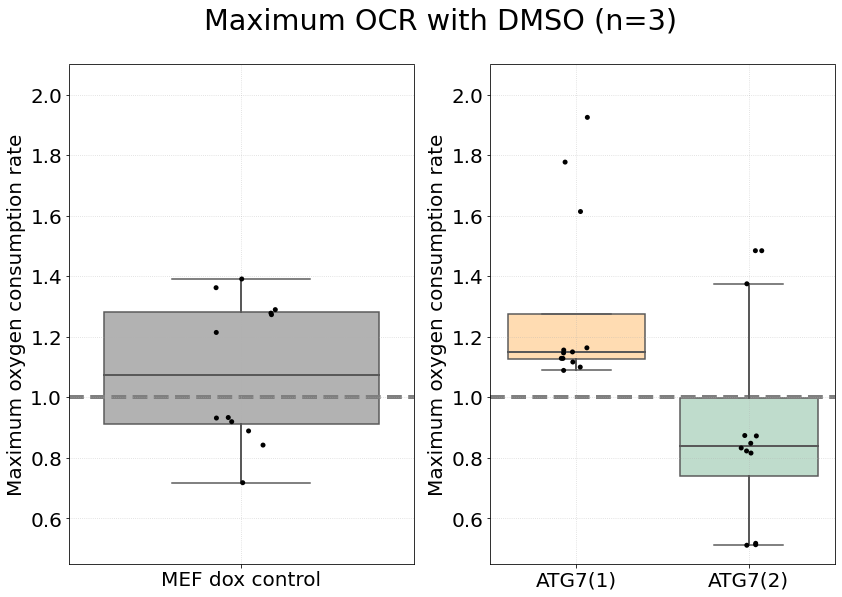

the pvalue between no dox and dox with BAF is 3.313E-01 for basal level rate
the pvalue between ATG7(1) and ATG7(2) with, BAF is 1.829E-05


<Figure size 864x576 with 0 Axes>

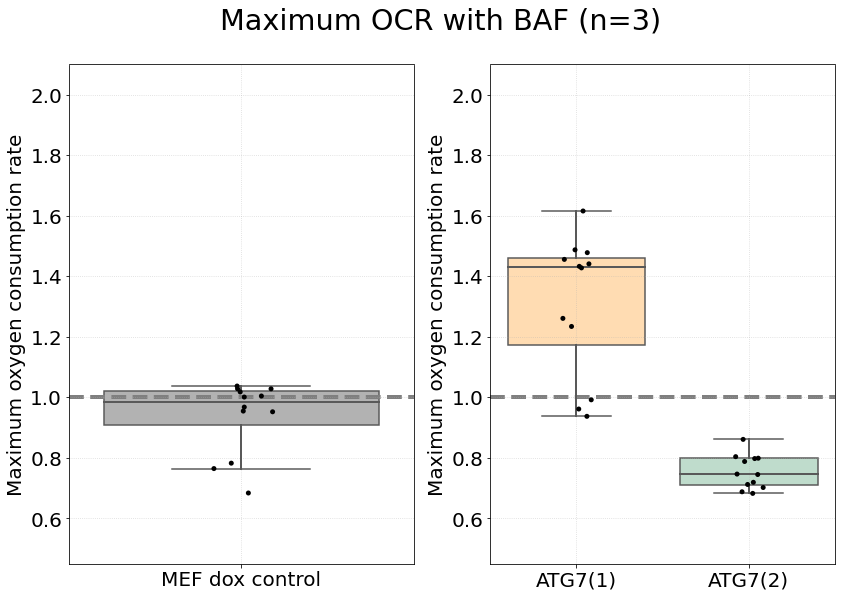

<Figure size 864x576 with 0 Axes>

In [30]:
# BASAL LEVEL RATE
dfs = recap_ocr_dmso_max, recap_ocr_baf_max
infos = 'DMSO', 'BAF'

controls = 'MEF dox control'
iso1 = 'ATG7(1)'
iso2 = 'ATG7(2)'

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]

    # Mann-Whitney analysis
    #controls
    statistic, pvalue = scipy.stats.mannwhitneyu(df_ori['Empty Vector +dox'], df_ori['Empty Vector -dox'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between no dox and dox with {info} is {Pvalue} for basal level rate')    

    #isoforms
    statistic, pvalue = scipy.stats.mannwhitneyu(df[iso1], df[iso2])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between ATG7(1) and ATG7(2) with, {info} is {Pvalue}')

    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2)
    plt.tight_layout()
    fig.suptitle(f'Maximum OCR with {info} (n=3)', y=1.05, fontsize="x-large")

    #graph for controls
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df.iloc[:,0:1], medianprops={'lw':2},
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df.iloc[:,0:1], color = 'k')
    
    fig.set_xlabel('')
    fig.set_ylabel('Maximum oxygen consumption rate')

    # Select which box you want to change    
    box_nodox = fig.patches[0]
    box_nodox.set_facecolor('black')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.1)


    #graph for ATG7(1) vs ATG7(2)
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df.iloc[:,1:], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df.iloc[:,1:], color = 'k')
   
    fig.set_xlabel('')
    fig.set_ylabel('Maximum oxygen consumption rate')

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.1)
                
    # save
    path2 = 'seahorse_OCR/'
    text_file = 'graph_all_ocr_maximum_'+info
    plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()